## Final Project Submission

* Student name: Solphine Joseph, Grace Rotich, Mathew Kiprotich, Hilary Simiyu, Clyde Ochieng, Derrick Kiptoo. 
* Student pace:  full time
* Scheduled project review date/time: 
* Instructor name: Nikita 
* Blog post URL:


# Kings County Housing Analysis with Multiple Linear Regression

## Overview

A real estate agency in Kingsway seeks to determine what are the contributing factors that affect the price of houses to make improvements where necessary. They want to employ an analytical approach rather than sentimental before arriving at a decision. Multilinear regression has been used for this project to understand how various features affect their pricing to better their services.

## Business Problem

In the face of market fluctuations and heightened competition within the real estate sector, our agency is grappling with pricing volatility, which poses significant challenges for our agents in devising effective business strategies. We seek strategic guidance to optimize our purchasing and selling endeavors, prioritizing informed decision-making to identify key areas of focus that promise maximum returns on investment.

### Objectives
* To determine the key factors influencing house prices.
* To develop multilinear regression models to predict house prices based on relevant features.
* To use insights from the regression analysis to optimize pricing strategies for both purchasing and selling properties.


### Hypothesis
* Null Hypothesis - There is no relationship between our independent variables and our dependent variable 

* Alternative Hypothesis - There is a relationship between our independent variables and our dependent variable

### Data Understanding:

In this project, we utilized the King County House Sales dataset, which serves as the foundational dataset for our analysis. It was sourced Kaggle.The dataset encompasses comprehensive information regarding house sales within King County, Washington, USA. It comprises a diverse array of features, including the number of bedrooms, bathrooms, square footage, as well as geographical and pricing details of the properties sold. This dataset is frequently employed in data science and machine learning endeavors, particularly for predictive modeling tasks such as regression analysis aimed at forecasting house prices based on the provided features.

##### King County Housing Data Columns 

The column names contained in column_names.md are:
* `id`: A unique identifier for each house sale.
* `date`: The date when the house was sold.
* `price`: The sale price of the house, serving as the target variable for predictive modeling.
* `bedrooms`, `bathrooms`, `sqft_living`, `sqft_lot`: Numerical features representing the number of bedrooms and bathrooms, as well as the living area and lot area of the house, respectively.
* `floors`: The number of floors in the house.
* `waterfront`, `view`, `condition`, `grade`: Categorical features describing aspects such as waterfront availability, property view, condition, and overall grade assigned to the housing unit.
* `yr_built`, `yr_renovated`: Year of construction and renovation of the house.
* `zipcode`, `lat`, `long`: Geographical features including ZIP code, latitude, and longitude coordinates.
* `sqft_above`, `sqft_basement`, `sqft_living15`, `sqft_lot15`: Additional numerical features providing details about the house's above-ground and basement square footage, as well as living area and lot area of the nearest 15 neighboring houses.

## Data Loading

#### Import Necessary Libraries



In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Creating a function that loads data and return it in a dataframe
def load_data(file_path):
    house_data = pd.read_csv(file_path)

    #shape
    shape = house_data.shape
    print(f"The dataset contains {shape[0]} houses with {shape[1]} features")
    print()
    
    #Data Types
    data_types = house_data.dtypes
    print("Columns and their data types:")
    for column, dtype in data_types.items():
        print(f"{column}: {dtype}")
    print()

    return house_data


In [3]:
load_data('data/kc_house_data.csv')  # Assuming 'data' folder is in the same directory




The dataset contains 21597 houses with 21 features

Columns and their data types:
id: int64
date: object
price: float64
bedrooms: int64
bathrooms: float64
sqft_living: int64
sqft_lot: int64
floors: float64
waterfront: object
view: object
condition: object
grade: object
sqft_above: int64
sqft_basement: object
yr_built: int64
yr_renovated: float64
zipcode: int64
lat: float64
long: float64
sqft_living15: int64
sqft_lot15: int64



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


The dataset contains 21 columns, each representing a distinct feature, and 21,597 rows, with each row corresponding to a specific house sale entry.

The dataset contains a mix of data types, including integers (int64), floating-point numbers (float64), and objects (strings).  For instance, numerical features such as bedrooms, bathrooms, and sqft_living are represented as integers or floating-point numbers to facilitate mathematical computations, while categorical features like waterfront and view are stored as objects to accommodate text-based categories.

In [4]:
kings_data = load_data('data/kc_house_data.csv')

The dataset contains 21597 houses with 21 features

Columns and their data types:
id: int64
date: object
price: float64
bedrooms: int64
bathrooms: float64
sqft_living: int64
sqft_lot: int64
floors: float64
waterfront: object
view: object
condition: object
grade: object
sqft_above: int64
sqft_basement: object
yr_built: int64
yr_renovated: float64
zipcode: int64
lat: float64
long: float64
sqft_living15: int64
sqft_lot15: int64



In [5]:
#create a function that takes in a column and returns the column statistics as a dictionary
def descriptive_analytics(column):
    stats_dict = column.describe().to_dict()
    
    print("Descriptive Statistics for Column '{}':".format(column.name))
    print("The count of the column is:", stats_dict['count'])
    print("The mean of the column is:", stats_dict['mean'])
    print("The standard deviation of the column is:", stats_dict['std'])
    print("The minimum value of the column is:", stats_dict['min'])
    print("The 25th percentile of the column is:", stats_dict['25%'])
    print("The median of the column is:", stats_dict['50%'])
    print("The 75th percentile of the column is:", stats_dict['75%'])
    print("The maximum value of the column is:", stats_dict['max'])

In [6]:
descriptive_analytics(kings_data['price'])

Descriptive Statistics for Column 'price':
The count of the column is: 21597.0
The mean of the column is: 540296.5735055795
The standard deviation of the column is: 367368.1401013945
The minimum value of the column is: 78000.0
The 25th percentile of the column is: 322000.0
The median of the column is: 450000.0
The 75th percentile of the column is: 645000.0
The maximum value of the column is: 7700000.0


We can see that the maximum price of a house is 7700000 dollars  and the minimum price is 78000 dollars

There are 21597 prices regarding to the houses in the dataset

Average price of a house is 540296.57 dollars

## Data Preperation



In [7]:
kings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
def identify_issues(dataset):
    # Identify missing values as a percentage of the whole dataset
    missing_values = (dataset.isnull().sum())/len(dataset) * 100

    # Identify duplicates
    duplicates = dataset.duplicated().sum()
    
    #return a dictionary 
    return {'duplicates': duplicates,
            'missing values': missing_values.round(2)}   


In [9]:
identify_issues(kings_data)

{'duplicates': 0,
 'missing values': id                0.00
 date              0.00
 price             0.00
 bedrooms          0.00
 bathrooms         0.00
 sqft_living       0.00
 sqft_lot          0.00
 floors            0.00
 waterfront       11.00
 view              0.29
 condition         0.00
 grade             0.00
 sqft_above        0.00
 sqft_basement     0.00
 yr_built          0.00
 yr_renovated     17.79
 zipcode           0.00
 lat               0.00
 long              0.00
 sqft_living15     0.00
 sqft_lot15        0.00
 dtype: float64}

The examination indicates that there are no duplicate entries within the dataset, ensuring the integrity of the records. However, attention is warranted to address missing values present in certain columns. Specifically, the 'waterfront' feature exhibits 11% of null values, representing a negligible portion of the dataset. Similarly, the 'yr_renovated' feature shows a relatively higher percentage of missing values, accounting for approximately 17.79% of the dataset

##### Before making changes make a copy instead of overwriting data

In [10]:
house_data_clean = kings_data.copy()

In [11]:
# Changing the date to date time
house_data_clean['date'] = pd.to_datetime(house_data_clean['date'])

# Extracting only the year from the column Date
house_data_clean.date = house_data_clean['date'].dt.year

# Changing the dates for the year built 
house_data_clean['yr_built'] = pd.to_datetime(house_data_clean['yr_built'],format='%Y').dt.year


The above code converts the 'date' column data to only contain the year the house was sold, for the purpose of analysis we will use only the year since the changes month by month will be minor.

#### Dealing with the missing values

In [12]:
def missing_values(dataset):
    # drop the rows from views
    dataset.dropna(subset=['view'],inplace=True)

    # Filling the NaN values for waterfront with NO
    dataset.waterfront.fillna('NO',inplace=True)
    
    # Dropping the yr_renovated column 
    dataset.drop('yr_renovated',axis=1,inplace=True)

In [13]:
missing_values(house_data_clean)

'yr_renovated' has the highest percentage of NaN values 17%. This will be dropped since it will not be used within our model inline with the business problem.

'Waterfront' feature has 11% null values, this was filled with NO on the assumption that these cells were not filled since they lacked waterfronts

For the 'View' column, the null values were dropped by row since the overall percentage impact would be minute

In [14]:
identify_issues(house_data_clean)

{'duplicates': 2,
 'missing values': id               0.0
 date             0.0
 price            0.0
 bedrooms         0.0
 bathrooms        0.0
 sqft_living      0.0
 sqft_lot         0.0
 floors           0.0
 waterfront       0.0
 view             0.0
 condition        0.0
 grade            0.0
 sqft_above       0.0
 sqft_basement    0.0
 yr_built         0.0
 zipcode          0.0
 lat              0.0
 long             0.0
 sqft_living15    0.0
 sqft_lot15       0.0
 dtype: float64}

In [15]:
house_data_clean[house_data_clean.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
3947,1825069031,2014,550000.0,4,1.75,2410,8447,2.0,NO,GOOD,Good,8 Good,2060,350.0,1936,98074,47.6499,-122.088,2520,14789
20038,8648900110,2014,555000.0,3,2.50,1940,3211,2.0,NO,NONE,Average,8 Good,1940,0.0,2009,98027,47.5644,-122.093,1880,3078


# Exploratory Data Analysis

### King County Housing Analysis and Visualization

In the exploratory phase of data analysis, histograms and box plots play pivotal roles in understanding the distribution patterns of variables. Histograms provide a visual representation of the frequency and spread of values within each variable, offering valuable insights into the data's central tendencies and variability. Meanwhile, box plots offer a concise summary of the data's distribution, including measures of central tendency, variability, and the presence of potential outliers. Together, these visualizations provide a comprehensive overview of the dataset's characteristics, laying the groundwork for deeper analysis and informing subsequent modeling and decision-making processes.

### Data Analysis

In [16]:
def calculate_statistics(df, column_name):
    #calculate mean
    mean_value = df[column_name].mean()
    #calculate mode, and pick the first if multiple mode exist
    mode_value = df[column_name].mode()[0]
    #calculating median
    median_value = house_data_clean[column_name].median()
    #calculating std
    std_value = df[column_name].std()

    # Create a dictionary to store the statistics
    statistics = {
        "Mean": mean_value,
        "Mode": mode_value,
        "Median": median_value,
        "Standard Deviation": std_value
    }
    return statistics

In [17]:
calculate_statistics(house_data_clean, "price")

{'Mean': 540057.663833937,
 'Mode': 350000.0,
 'Median': 450000.0,
 'Standard Deviation': 366059.58123129635}

This code snippet categorizes columns with numeric values from the DataFrame house_data_clean and prints them out

In [18]:
# Initialize lists for numeric columns
numeric_columns = []


# Iterate through columns and categorize them based on data type
for column in house_data_clean.columns:
        if house_data_clean[column].dtype in ['int64', 'float64']:  # Check if the column data type is numeric
            numeric_columns.append(column)
    
            
print ("These are columns with numerical values:\n",numeric_columns)

These are columns with numerical values:
 ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


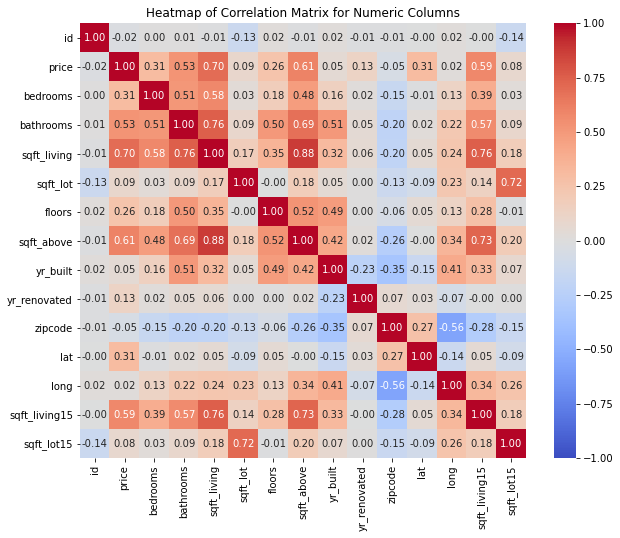

In [19]:
#This code snippet calculates the correlation matrix for numeric columns in the kings_data DataFrame and visualizes it using a heatmap.
numeric_columns = kings_data.select_dtypes(include=['int64', 'float64','object'])
# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()
    
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix for Numeric Columns')
plt.show()

Perfect positive correlation (1): Variables increase together perfectly.
High positive correlation (0.7 to 1): Variables mostly move in the same direction strongly.
Moderate positive correlation (0.3 to 0.7): Variables tend to move together moderately.
Weak positive correlation (0 to 0.3): Variables show a weak, inconsistent relationship.
No correlation (0): Variables are independent of each other.
Weak negative correlation (-0.3 to 0): Weak, inconsistent negative relationship.
Moderate negative correlation (-0.7 to -0.3): Moderate negative relationship.
High negative correlation (-1 to -0.7): Variables move strongly in opposite directions.
Perfect negative correlation (-1): Variables decrease together perfectly.

In [20]:
house_data_clean.drop(columns=['date', 'sqft_lot', 'condition', 'zipcode', 'long', 'sqft_lot15', 'yr_built', 'lat'], inplace=True)

#### Analysis for categorical columns

This code snippet visualizes the relationship between the 'waterfront' feature and the average sale price. A bar plot is used to show the average price for properties with and without waterfront. 

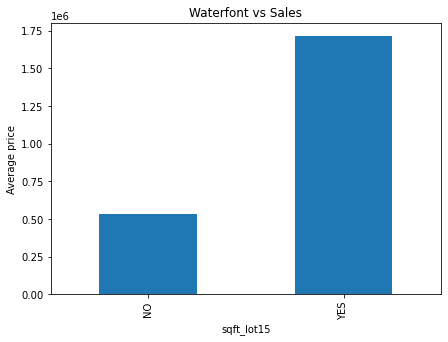

In [21]:
Categorical = ['waterfront', 'condition', 'grade'] 

# How waterfront relates to saleprice
# plot the barplot
plt.figure(figsize = (7,5))
kings_data.groupby('waterfront')['price'].mean().plot.bar()

# set the axes and title
plt.xlabel(column)
plt.ylabel('Average price')
plt.title('Waterfont vs Sales')

# display the plot
plt.show()

The plot above clearly shows that houses with waterfronts are the most popular and sells the most

This code snippet visualizes the relationship between the 'condition' feature and the average sale price. A bar plot is used to show the average price for properties with different conditions. 

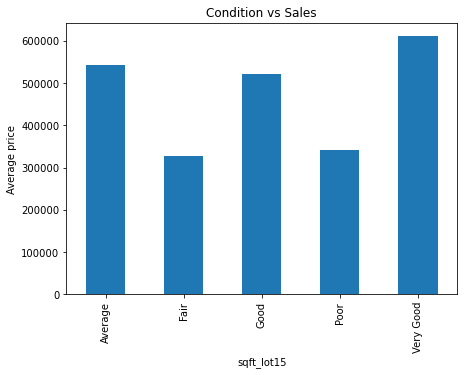

In [22]:
# How condition relates to saleprice
# plot the barplot
plt.figure(figsize = (7,5))
kings_data.groupby('condition')['price'].mean().plot.bar()

# set the axes and title
plt.xlabel(column)
plt.ylabel('Average price')
plt.title('Condition vs Sales')

# display the plot
plt.show()

The houses that are in good cnditions are the most popular

This code snippet visualizes the relationship between the 'grade' feature and the average sale price. A bar plot is used to show the average price for properties with different grades. 

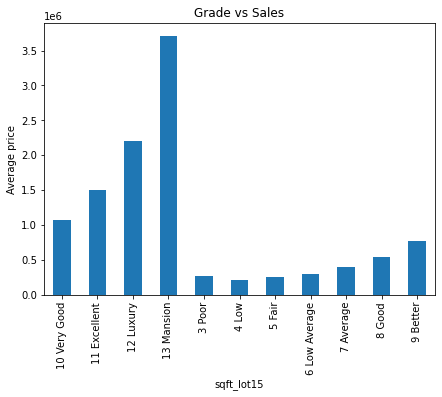

In [23]:
# How grade relates to saleprice
# plot the barplot
plt.figure(figsize = (7,5))
kings_data.groupby('grade')['price'].mean().plot.bar()

# set the axes and title
plt.xlabel(column)
plt.ylabel('Average price')
plt.title('Grade vs Sales')

# display the plot
plt.show()

compairing mansions with the others u can tell its the highest selling 

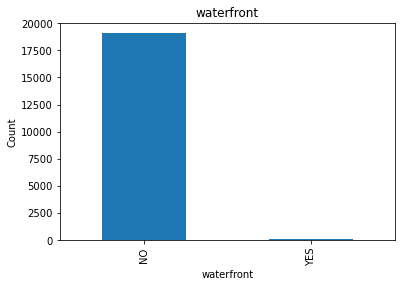

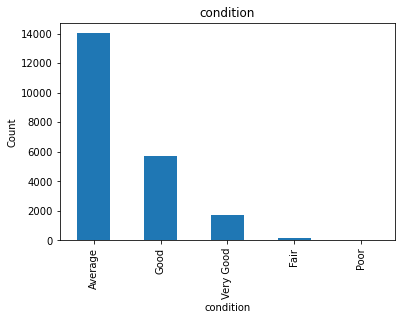

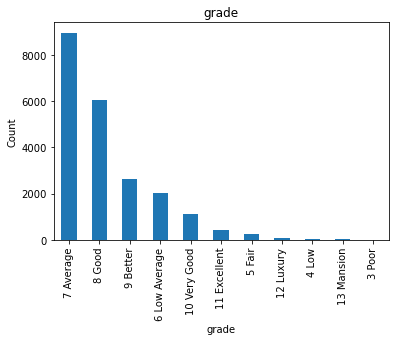

In [24]:
#This code snippet iterates through the categorical columns specified in the list `Categorical` and creates bar charts to visualize the count of each category
for column in Categorical:
    plt.figure()
    kings_data[column].value_counts().plot.bar()
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(column)
    plt.show()

In [25]:
#This function creates subplots of boxplots for each numeric column in the DataFrame, allowing for visualization of the data distribution and identification of outliers. Adjust the parameters and example usage according to your DataFrame and preferences.

def check_for_outliers_and_plot_boxplot(df, numeric_columns_list, figsize=(12, 12)):
    
    # Calculate number of subplots
    num_plots = len(numeric_columns)
    num_cols = 2  # Number of columns in each row of subplots
    num_rows = (num_plots + 1) // num_cols
    
    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()


    # Plot boxplots for each column
    for i, column in enumerate(numeric_columns):
      sns.boxplot(x=df[column], ax=axes[i])
      axes[i].set_title(f'Boxplot of {column}')
      axes[i].set_xlabel(column)
      
      
    

From the illustration you can see the data set has outliers 

This function removes outliers from the specified column(s) in the DataFrame based on Z-scores, with an option to set a custom threshold. .

In [26]:
def remove_outliers_by_zscore(df, col, threshold=3):
    
    # Iterate over each specified column
    for column in col:
        # Calculate Z-scores for the column
        z_scores = (df[column] - df[column].mean()) / df[column].std()
        # Filter rows where Z-score exceeds the threshold
        df_cleaned = df[(z_scores.abs() < threshold)]
    
    return df_cleaned

This will return a DataFrame with outliers removed from the specified numeric columns based on their Z-scores, using a threshold of 3.

c:\Users\admin\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


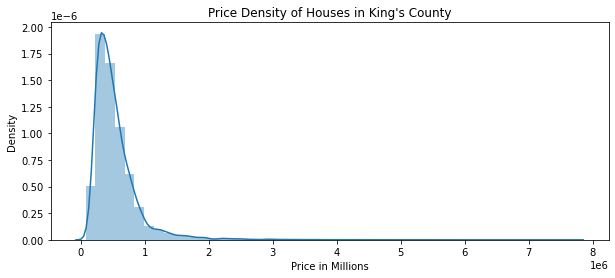

In [27]:
# Plotting a histogram with kernel density estimate (KDE) of the "price" variable
plt.figure(figsize=(10,4))
price_dist = sns.distplot(kings_data["price"])
price_dist.set(xlabel="Price in Millions", title="Price Density of Houses in King's County")
plt.savefig('Visualization2')  # Save the plot as an image file

The observation reveals that the distribution of house is right-skewed.we look at house prices, we notice that most houses are not very expensive, but there are a few that are very pricey.

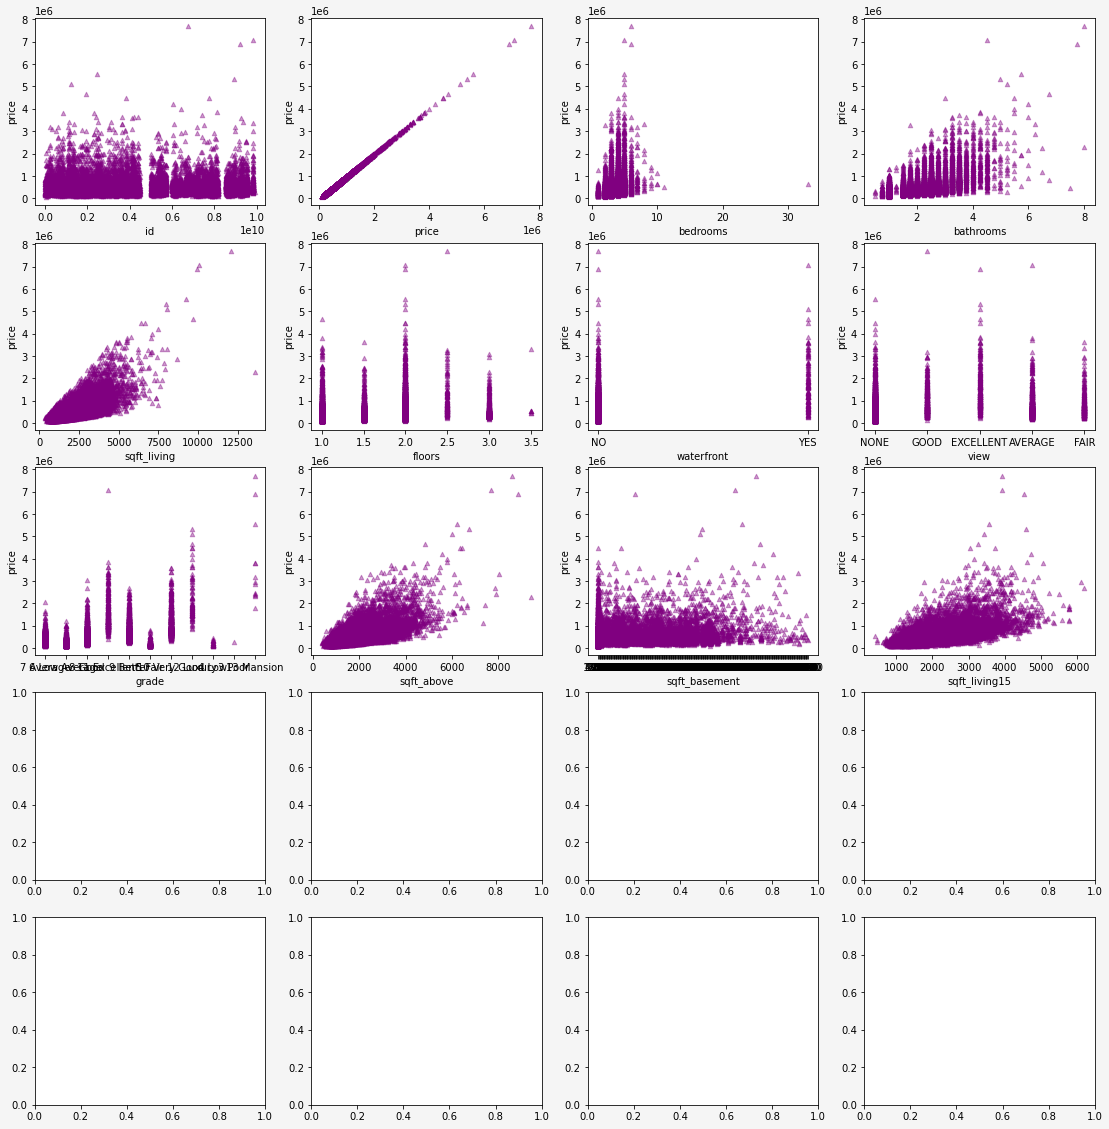

In [28]:
#This code snippet creates a scatter plot matrix for the house data, with each numeric variable plotted against the 'price'.
# creating a list of all column names
plot_list = list(house_data_clean.columns)
len(plot_list)
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(19,20))
axes = axes.flatten() # flatten the array to make it easier to iterate over

for i, xcol in enumerate(plot_list[0:19]):
    fig.patch.set_facecolor('whitesmoke')
    house_data_clean.plot(kind='scatter', x=xcol, y='price', ax=axes[i], alpha=0.4, color='Purple', marker='^')
    
plt.show() # add this to display the plot

## Simple Linear Model

From our EDA we can see that 'sqft_living' has the highest correlation with price, thus we'll use this as the independent variable for our analysis

In [29]:
# Create variables for our independent and dependent features
X = house_data_clean['sqft_living']
y = house_data_clean['price']

In [30]:
#create a function to create regression models
def regression(X_value, y_value):
    # create the model
    model = sm.OLS(y_value, sm.add_constant(X_value))
    
    #Fit the model
    results = model.fit()

    return results

In [31]:
#call the simple_regression function and store output in results variable
simple_model_results = regression(X, y)

In [32]:
#create a function for analysing regression results
def regression_analysis(regression_results):
    #Models P_Value
    results_pvalue = regression_results.f_pvalue

    #Model Rsquared
    r_squared = regression_results.rsquared

    #Parameters
    coeffecients = regression_results.params

    return {'Model R-Squared': r_squared,
            'Model P_value': results_pvalue,
            'Coeffecients': coeffecients, 
           }
    

In [33]:
#calling the simple regression analysis function to get summary
regression_analysis(simple_model_results)

{'Model R-Squared': 0.4922247077876327,
 'Model P_value': 0.0,
 'Coeffecients': const         -42152.946806
 sqft_living      279.932115
 dtype: float64}

From the results above we get that:
Our model is statistically significant, with a p-value well below the standard alpha of 0.05

Our model explains about 49.2% of the variance in home price, the dependent variable

For a house with 0 squarefoot of living area, our model would predict a home price of about -42152.94 dollars. 

An increase of 1 square foot in living area  is associated with an increase of about 279.93 dollars in house price.

#### Assumptions of linear regression

Linear regression makes several assumptions about the data, such as :

Linearity of the data. The relationship between the predictor (x) and the outcome (y) is assumed to be linear.

Normality of residuals. The residual errors are assumed to be normally distributed.

Homogeneity of residuals variance. The residuals are assumed to have a constant variance (homoscedasticity)

Independence of residuals error terms.

In [34]:
# creating a function to check the assumptions of linear regression
def check_regression_assumptions(results):
     
    # Residuals
    residuals = results.resid
    
     # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Linearity Check (Fitted Values vs. Residuals Plot)
    sns.residplot(x=results.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1}, ax=axes[0, 0])
    axes[0, 0].set_title('Linearity Check: Fitted Values vs. Residuals')
    axes[0, 0].set_xlabel('Fitted values')
    axes[0, 0].set_ylabel('Residuals')
    
    # Independence of Residuals (Durbin-Watson Statistic)
    dw_statistic = sm.stats.stattools.durbin_watson(residuals)
    axes[0, 1].text(0.5, 0.5, f'Durbin-Watson statistic: {dw_statistic}', fontsize=12, ha='center')
    axes[0, 1].axis('off') 
    
    # Homoscedasticity Check (Residuals vs. Fitted Values Plot)
    sns.residplot(x=results.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1}, ax=axes[1, 0])
    axes[1, 0].set_title('Homoscedasticity Check: Fitted Values vs. Residuals')
    axes[1, 0].set_xlabel('Fitted values')
    axes[1, 0].set_ylabel('Residuals')
    
    # Normality of Residuals Check (Histogram and Q-Q Plot)
    sns.histplot(residuals, kde=True, color='blue', bins=20, ax=axes[1, 1])
    axes[1, 1].set_title('Histogram of Residuals')
    axes[1, 1].set_xlabel('Residuals')
    axes[1, 1].set_ylabel('Frequency')
    
    # Show plot
    plt.tight_layout()
    plt.show()

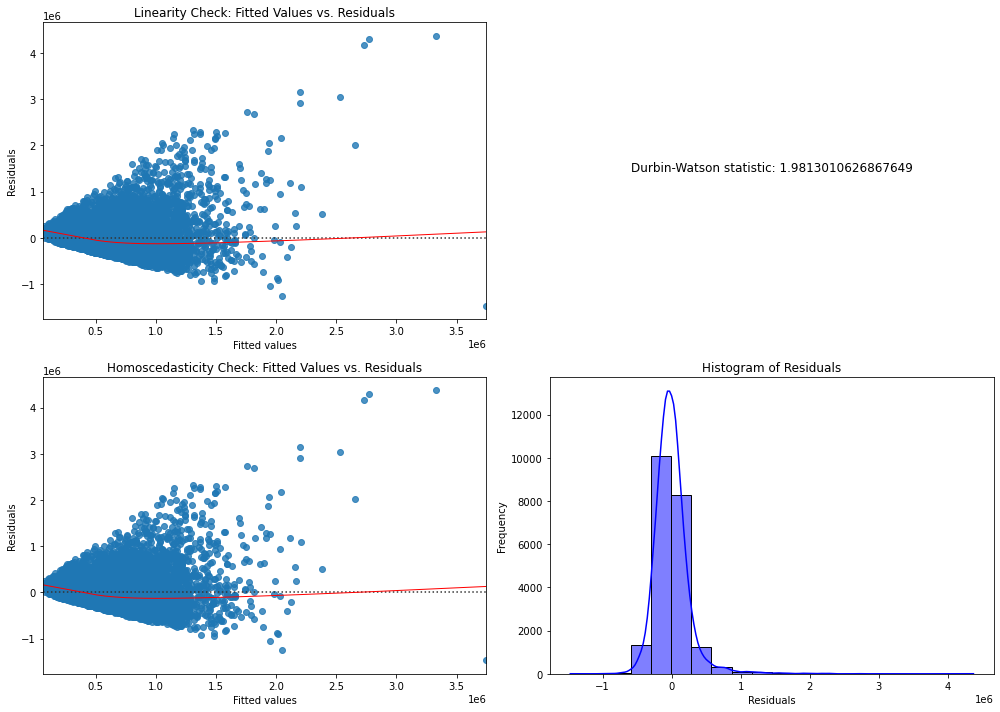

In [35]:
# call our function to check on our simple regression model
check_regression_assumptions(simple_model_results)

From the output above we can interpret the results as:

* Durbin-Watson statistic of approximately 1.98, shows that there is no significant autocorrelation in the residuals, which is a favorable result for your regression analysis
* The linearity check plot shows a random scatter of points around the horizontal axis, which suggests that the linearity assumption is reasonable, indicating that the relationship between the independent variables and the dependent variable is approximately linear.
* In the  homoscedasticity plot we can observe a pattern of a 'funnel shape', it suggests that the homoscedasticity assumption may be violated, indicating heteroscedasticity.
* The Q-Q plot, shows the points fall close to the diagonal line, it suggests that the residuals follow a normal distribution.

#### Shortcomings of the simple linear regression

Simple linear regression assumes that the residuals are normally distributed with constant variance. However, in real-world data, the assumptions of normality and homoscedasticity may be violated, leading to biased estimates and unreliable inference

House prices are influenced by a multitude of factors beyond just square footage. Ignoring these factors in favor of a simple linear model may result in omitted variable bias and inaccurate predictions.

The r-squared value indicates that our simple regression model only explains 43.0% variation in home price and this is not extremely high

## Multilinear Regression
### Identification of categorical variables for prediction


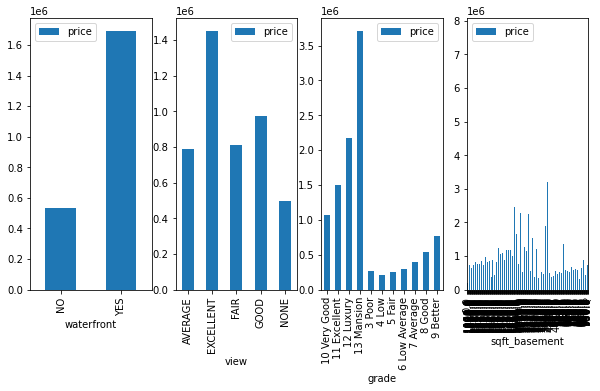

In [36]:
import matplotlib.pyplot as plt

categorical_features = house_data_clean.select_dtypes("object").columns
fig, axes = plt.subplots(ncols=len(categorical_features), figsize=(10,5))

for index, feature in enumerate(categorical_features):
   house_data_clean.groupby(feature).mean().plot.bar(
        y="price", ax=axes[index])

In [37]:
#Create dataframe
cat_column= pd.DataFrame(house_data_clean[['sqft_living','bedrooms','grade']])
cat_column


,sqft_living,bedrooms,grade
0,1180,3,7 Average
1,2570,3,7 Average
2,770,2,6 Low Average
3,1960,4,7 Average
4,1680,3,8 Good
...,...,...,...
21592,1530,3,8 Good
21593,2310,4,8 Good
21594,1020,2,7 Average
21595,1600,3,8 Good


### Converting Categorical to Numeric

In [38]:
data_encoded = pd.get_dummies(cat_column, columns=['grade'], drop_first=True)
data_encoded

,sqft_living,bedrooms,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,1180,3,0,0,0,0,0,0,0,1,0,0
1,2570,3,0,0,0,0,0,0,0,1,0,0
2,770,2,0,0,0,0,0,0,1,0,0,0
3,1960,4,0,0,0,0,0,0,0,1,0,0
4,1680,3,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,3,0,0,0,0,0,0,0,0,1,0
21593,2310,4,0,0,0,0,0,0,0,0,1,0
21594,1020,2,0,0,0,0,0,0,0,1,0,0
21595,1600,3,0,0,0,0,0,0,0,0,1,0


In [39]:
# modifying columns
data_encoded.columns =data_encoded.columns.str.replace(' ', '')
data_encoded

,sqft_living,bedrooms,grade_11Excellent,grade_12Luxury,grade_13Mansion,grade_3Poor,grade_4Low,grade_5Fair,grade_6LowAverage,grade_7Average,grade_8Good,grade_9Better
0,1180,3,0,0,0,0,0,0,0,1,0,0
1,2570,3,0,0,0,0,0,0,0,1,0,0
2,770,2,0,0,0,0,0,0,1,0,0,0
3,1960,4,0,0,0,0,0,0,0,1,0,0
4,1680,3,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,3,0,0,0,0,0,0,0,0,1,0
21593,2310,4,0,0,0,0,0,0,0,0,1,0
21594,1020,2,0,0,0,0,0,0,0,1,0,0
21595,1600,3,0,0,0,0,0,0,0,0,1,0


In [40]:
def replace_bool_with_numeric(df, column_name):
    """
    Replace boolean values with numeric values (1 for True, 0 for False) in the specified column of the DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the column to be modified.
    column_name (str): The name of the column containing boolean values to be replaced.

    Returns:
    None
    """
    df[column_name] = df[column_name].replace({True: 1, False: 0})

# Apply the function to each grade column
grade_columns = ['grade_11Excellent', 'grade_12Luxury', 'grade_13Mansion', 
                 'grade_3Poor', 'grade_4Low', 'grade_5Fair', 
                 'grade_6LowAverage', 'grade_7Average', 'grade_8Good', 'grade_9Better']
for column in grade_columns:
    replace_bool_with_numeric(data_encoded, column)

In [41]:
data_encoded

,sqft_living,bedrooms,grade_11Excellent,grade_12Luxury,grade_13Mansion,grade_3Poor,grade_4Low,grade_5Fair,grade_6LowAverage,grade_7Average,grade_8Good,grade_9Better
0,1180,3,0,0,0,0,0,0,0,1,0,0
1,2570,3,0,0,0,0,0,0,0,1,0,0
2,770,2,0,0,0,0,0,0,1,0,0,0
3,1960,4,0,0,0,0,0,0,0,1,0,0
4,1680,3,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,3,0,0,0,0,0,0,0,0,1,0
21593,2310,4,0,0,0,0,0,0,0,0,1,0
21594,1020,2,0,0,0,0,0,0,0,1,0,0
21595,1600,3,0,0,0,0,0,0,0,0,1,0


In [42]:
multi_model=regression(data_encoded,y)

In [43]:
#calling the regression analysis function to get summary
regression_analysis(multi_model)

{'Model R-Squared': 0.5831491676288707,
 'Model P_value': 0.0,
 'Coeffecients': const                5.469724e+05
 sqft_living          1.750225e+02
 bedrooms            -2.320617e+04
 grade_11Excellent    2.775082e+05
 grade_12Luxury       7.638318e+05
 grade_13Mansion      1.966551e+06
 grade_3Poor         -3.527780e+05
 grade_4Low          -4.171575e+05
 grade_5Fair         -4.151264e+05
 grade_6LowAverage   -3.913080e+05
 grade_7Average      -3.644529e+05
 grade_8Good         -3.055288e+05
 grade_9Better       -1.872877e+05
 dtype: float64}

### Model Interpretation

Model R-Squared: The R-squared value (0.583) indicates the proportion of variance in the target variable (house prices) that is explained by the independent variables (features) in the model. In this case, approximately 58.3% of the variance in house prices is explained by the features included in the model. A higher R-squared value suggests that the model fits the data well.

Model P-value: The p-value (0.0) associated with the overall model indicates the statistical significance of the model. A p-value less than the significance level (e.g., 0.05) suggests that the model is statistically significant, meaning that at least one of the coefficients is significantly different from zero. In this case, the very low p-value indicates that the model is statistically significant.


Coefficients: The coefficients represent the estimated effects of the independent variables (features) on the target variable (house prices), holding other variables constant. Each coefficient indicates the change in the target variable for a one-unit change in the corresponding independent variable, while keeping other variables constant.

For example, the coefficient for 'sqft_living' is approximately 175.02. This suggests that, on average, for every additional square foot of living space in a house, the price increases by $175, holding other factors constant.
Similarly, coefficients for the 'grade' categories represent the change in house price compared to a reference category (e.g., grade_11Excellent, grade_12Luxury, etc.). Positive coefficients indicate an increase in price compared to the reference category, while negative coefficients indicate a decrease.

### Train Test split

The dataset is split into training and testing sets. This is in prepartoon of Fitting the model on the training data and evaluating its performance on the separate testing data. This allows you to assess how well the model generalizes to new, unseen data.

The X parameter represents the features (independent variables), while y represents the target variable (dependent variable).

30% of the data is used for testing and 70% is used for training whle random_state is specified to ensure reproducibility of the split.


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


# Define a function named "train_test" that takes two input parameters, x and y.
def train_test(x,y):
    
    # Split the input data into training and testing sets using the "train_test_split" method from scikit-learn.
    # Use a test size of 0.3 and a random state of 42.
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    
    # Create a LinearRegression object and train it using the training data.
    linreg = LinearRegression()
    linreg.fit(x_train, y_train)
    
    # Make predictions using the trained model for both the training and testing data.
    y_hat_train = linreg.predict(x_train)  # these are our prediction values
    y_hat_test = linreg.predict(x_test)
    
    # Print the R-squared value for the testing data.
    print('the r2_score:', r2_score(y_test, y_hat_test), '\n')
    
    # Calculate the mean absolute error and mean squared error for both the training and testing data.
    train_mae = mean_absolute_error(y_train, y_hat_train)
    test_mae = mean_absolute_error(y_test, y_hat_test)
    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)
    
    # Print the mean absolute error and mean squared error for both the training and testing data.
    print('train MAE:', train_mae)
    print('test MAE:', test_mae, '\n')
    print('train MSE:', train_mse)
    print('test MSE:', test_mse, '\n')
    
    # Print the root mean squared error for both the training and testing data.
    print('train root Mean squared Error: ', train_mse** 0.5)
    print('test root Mean squared Error: ', test_mse** 0.5, '\n')
    
    # Create a scatter plot comparing the predicted values to the actual values for both the training and testing data.
    plt.figure(figsize=(10, 6))

    plt.scatter(y_train, y_hat_train, alpha=0.5, color='#00BFFF', label='train')
    sns.regplot(x=y_train, y=y_hat_train, scatter=False, color='r', label='train fit')

    plt.scatter(y_test, y_hat_test, alpha=0.5, color='#FFC0CB', label='test')
    sns.regplot(x=y_test, y=y_hat_test, scatter=False, color='g', label='test fit')

    plt.scatter(x=y, y=y, color='maroon', alpha=0.3, label='actual')

    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual Price vs Predicted Price')

    plt.legend()
    plt.grid()
    plt.show()
    
    # Create a new LinearRegression object and train it using the training data.
    ml =LinearRegression()
    ml.fit(x_train,y_train)
    
    # Use the new model to make predictions for the testing data.
    y_pred = ml.predict(x_test)
    
    # Create a DataFrame containing the actual values, predicted values, difference, and percentage difference for the testing data.
    pred_y_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Value' : y_pred, 'Difference' :abs(y_test-y_pred) , 'Percentage Difference' : abs((y_test-y_pred)/y_test*100)})
    
    # Calculate the mean percentage difference between the actual and predicted values for the testing data.
    mean_percentage = pred_y_df['Percentage Difference'].mean()
    
    # Print the mean percentage difference for the testing data.
    print('mean_diff:', mean_percentage)

    return pred_y_df[0:5]

After spliting the dataset, the function creates a LinearRegression object called linreg and trains it using the training data (x_train and y_train). It then uses the trained model to make predictions for both the training and testing data.
Model Evaluation:
The code calculates and prints various evaluation metrics such as R-squared, mean absolute error (MAE), mean squared error (MSE), root mean squared error (RMSE), and mean percentage difference.
After which it creates a Scatter Plot. The code creates a scatter plot comparing the predicted values to the actual values for both the training and testing data. It also includes a regression line for each set of data points.
The function returns a DataFrame containing the actual values, predicted values, difference, and percentage difference for the testing data. It only returns the first 5 rows of the DataFrame.



the r2_score: 0.5978897977659456 

train MAE: 156674.07834657672
test MAE: 154037.81627384163 

train MSE: 56599285552.34404
test MSE: 55142866697.026695 

train root Mean squared Error:  237906.04353892323
test root Mean squared Error:  234825.18326837668 



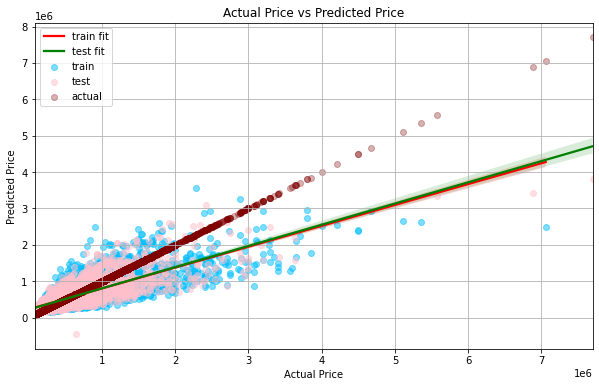

mean_diff: 31.62652023361938


,Actual Values,Predicted Value,Difference,Percentage Difference
19009,1000000.0,6.320870e+05,367913.009595,36.791301
6370,870000.0,1.083277e+06,213277.441830,24.514648
13983,160000.0,3.030799e+05,143079.872314,89.424920
7837,1650000.0,7.936058e+05,856394.226441,51.902680
9491,367500.0,4.820375e+05,114537.536619,31.166677


In [45]:
x = data_encoded
y = house_data_clean['price']
train_test(x,y)

The R-squared value (r2_score) is a measure of how well the model fits the data, with values closer to 1 indicating a better fit. In this case, r2 score is 0.59788 which suggests that the model explains 59% of the variability in the target variable.

The mean absolute error (MAE) is a measure of the average magnitude of errors in the predictions made by the model. The lower the MAE, the better the model. The train MAE and test MAE are 156674.07834 and 154037.816273 respectively, which are quite large values, indicating that the model is not performing well.

The root mean squared error (RMSE) is the square root of the MSE, and it measures the average magnitude of the error in the model's predictions. The train RMSE and test RMSE are 237906.0435 and 234825.1832 respectively, which are also quite large.


Overall, these metrics suggest that the linear regression model is not performing very well in making accurate predictions on the dataset.

## Linear Transformation

#### Log Transformation Model

Below is a histogram showing the data distribution in the price column used in modelling before transformation.

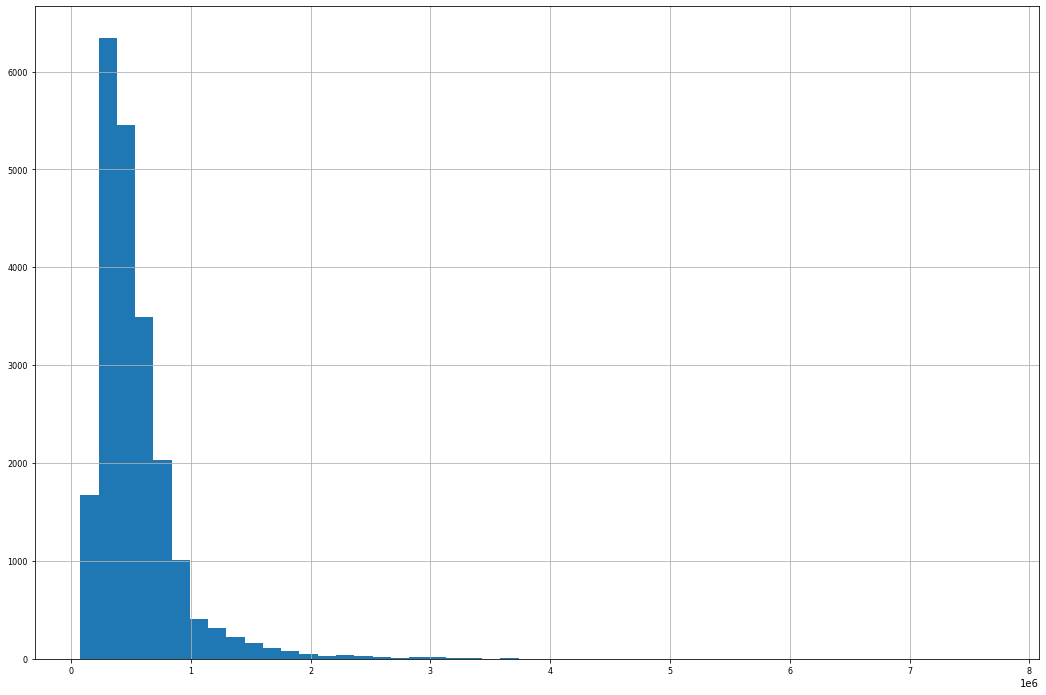

In [46]:

# Plotting histograms of all the variables
house_data_clean['price'].hist(figsize=(18,12), bins=50, xlabelsize=8, ylabelsize=8);

 The price distribution is right-skwed. A logarithmic transformation is used on the values in the 'price' column of the DataFrame, which can be useful for data preprocessing when dealing with skewed distributions or to linearize relationships between variables in certain statistical analyses.

In [47]:
y_log = np.log(y)
y_log.name = "log(price)"
y_log

0        12.309982
1        13.195614
2        12.100712
3        13.311329
4        13.142166
           ...    
21592    12.793859
21593    12.899220
21594    12.904459
21595    12.899220
21596    12.691580
Name: log(price), Length: 21534, dtype: float64

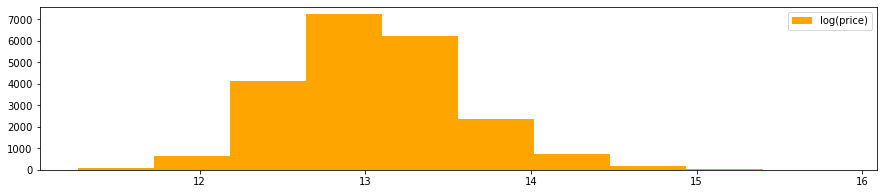

In [48]:
# Plot distributions of raw vs. transformed values

fig, ax = plt.subplots(figsize=(15,3))
ax.hist(y_log, color="orange", label="log(price)")
ax.legend();

As shown above, the distribution after standardization is normally distributed.

the r2_score: 0.5670850417656108 

train MAE: 0.28243742951685746
test MAE: 0.28185242210548367 

train MSE: 0.12328613680453443
test MSE: 0.12219442473578497 

train root Mean squared Error:  0.35112125655467574
test root Mean squared Error:  0.3495631913342493 



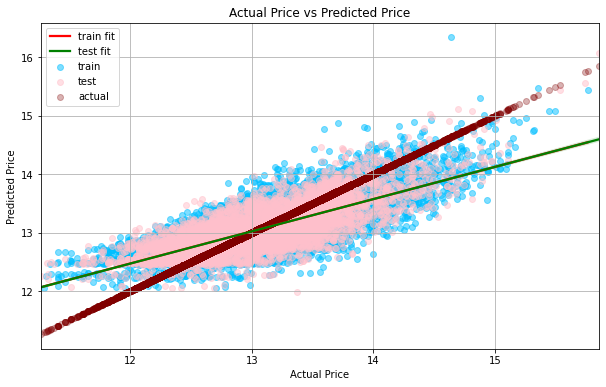

mean_diff: 2.1662961050481617


,Actual Values,Predicted Value,Difference,Percentage Difference
19009,13.815511,13.152049,0.663462,4.802298
6370,13.676248,13.816022,0.139773,1.022016
13983,11.982929,12.549739,0.566810,4.730143
7837,14.316286,13.494813,0.821472,5.738027
9491,12.814479,13.059385,0.244907,1.911172


In [49]:
#Log transformation model

train_test(data_encoded,y_log)

An R2 score of 0.568 indicates that the model explains 56.8% of the variance in the logarithmic actual values.
An MAE value of 0.282 for train data and 0.284 for test data suggest that, on average, the model's logarithmic predictions are off by about 28.2%and 28.4 respectively from the logarithmic actual values.
An MSE value of 0.1228 for train data and an MSE of 0.1256 for test data suggest that, on average, the model's logarithmic predictions are off by the squared value of about 12.28% and 12.56% respectively from the logarithmic actual values.
An RMSE value of 0.3504 for train data and 0.3544 for test data suggest that, on average, the model's logarithmic predictions are off by the squared root value of about 35.04% and 35.44% respectively from the logarithmic actual values

In [50]:
#fitting the model
log_model = sm.OLS(y_log, sm.add_constant(data_encoded)).fit()



### Checking for assumptions.

Linearity: Check for linearity by plotting the dependent variable against each independent variable. If the relationship appears to be nonlinear, we may need to transform one or more variables or use a different type of model.

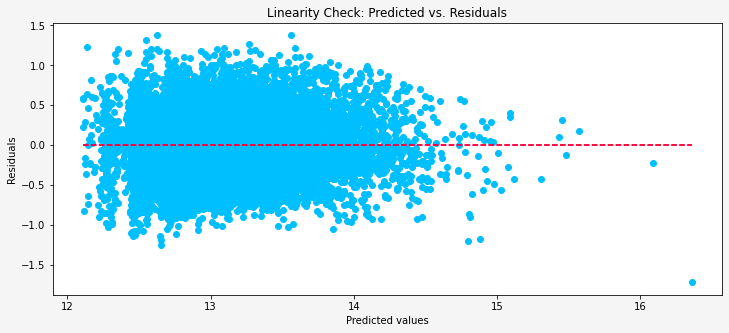

In [51]:
# plotting predicted values vs. residuals
def linearity_check(model):
    model_fitted_y = model.fittedvalues
    model_residuals = model.resid
    fig, ax = plt.subplots(figsize=(12,5), facecolor='#F5F5F5')
    _ = ax.scatter(model_fitted_y, model_residuals, color='#00BFFF')

    # adding horizontal line at y=0
    ax.hlines(y=0, xmin=model_fitted_y.min(), xmax=model_fitted_y.max(), colors='#FF00FF', linestyles='--')
    ax.set_xlabel('Predicted values')
    ax.set_ylabel('Residuals')
    ax.set_title('Linearity Check: Predicted vs. Residuals')
    ax.hlines(y=0, xmin=model_fitted_y.min(), xmax=model_fitted_y.max(), colors='r', linestyles='--')
    ax.set_xlabel('Predicted values')
    ax.set_ylabel('Residuals')
    ax.set_title('Linearity Check: Predicted vs. Residuals')
    plt.show()



# Linearity Check
linearity_check(log_model)


from the visualization our model is not linearly distributed

Normality: Check for normality of residuals by plotting a histogram of the residuals and examining whether they are normally distributed. We can also use a normal probability plot or a statistical test such as the Shapiro-Wilk test.

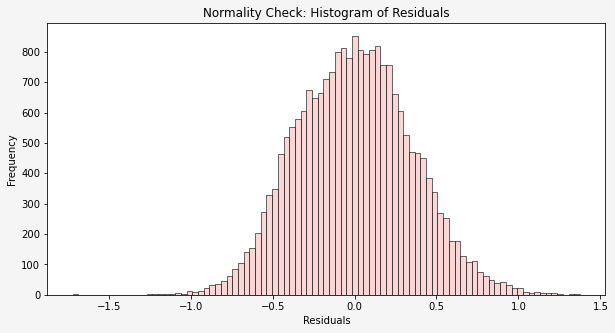

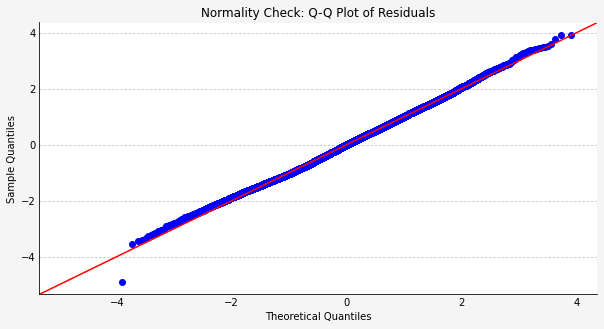

In [52]:
import scipy.stats as stats



# plotting histogram of residuals
def normality_check(residuals):
    # Histogram of residuals
    fig, ax = plt.subplots(figsize=(10,5), facecolor='#F5F5F5')
    sns.histplot(residuals, color='#F7CAC9')
    ax.set_title('Normality Check: Histogram of Residuals')
    ax.set_xlabel('Residuals')
    ax.set_ylabel('Frequency')
    
    # Q-Q plot of residuals
    fig, ax = plt.subplots(figsize=(10,5), facecolor='#F5F5F5')
    sm.qqplot(residuals, fit=True, line='45', ax=ax)
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Sample Quantiles')
    ax.set_title('Normality Check: Q-Q Plot of Residuals')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', which='both', length=0)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.show()

    # Normality Check
normality_check(log_model.resid)

graphs suggest that the residuals here are normally distributed compared to the base model, this is an improvement compared to the base model

Homoscedasticity: Check for homoscedasticity (equal variance) of residuals by plotting the residuals against the predicted values. If the residuals appear to fan out or form a funnel shape, this indicates heteroscedasticity (unequal variance) and may require a transformation or a different model.

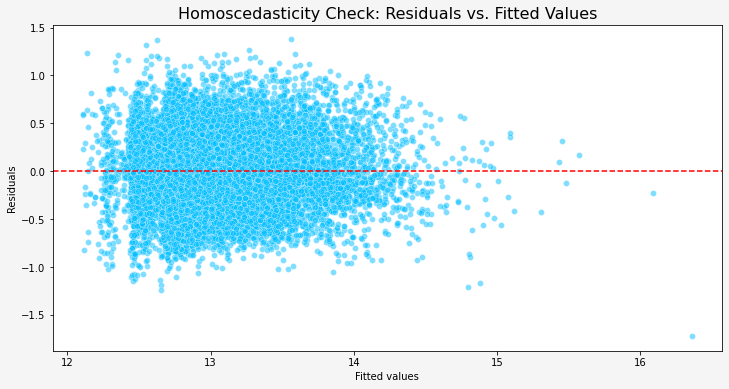

In [53]:
# plotting residuals vs. fitted values
def homoscedasticity_check(model):
    model_residuals = model.resid
    model_fitted_y = model.fittedvalues
    fig, ax = plt.subplots(figsize=(12,6), facecolor='#F5F5F5')
    sns.scatterplot(x=model_fitted_y, y=model_residuals, color='#00BFFF', alpha=0.5, ax=ax)

    # add horizontal line at y=0
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')
    ax.set_title('Homoscedasticity Check: Residuals vs. Fitted Values', fontsize=16)
    plt.show()

# Homoscedasticity Check
homoscedasticity_check(log_model)

The scatter plot of the residuals against the fitted show a random pattern of points that are roughly evenly distributed around the horizontal line, this passes the Homoscedasticity of linearity assumption

Independence: Check for independence of residuals by plotting the residuals against the order in which they were observed or against time (if applicable). If there is a pattern or correlation, this indicates that the model may not be capturing all relevant information.

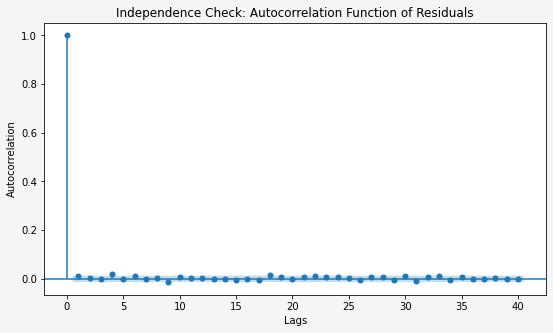

In [54]:
# plotting autocorrelation function of residuals
def independence_check(residuals):
    fig, ax = plt.subplots(figsize=(9,5), facecolor='#F5F5F5')
    _ = sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax)
    ax.set_xlabel('Lags')
    ax.set_ylabel('Autocorrelation')
    ax.set_title('Independence Check: Autocorrelation Function of Residuals')
    plt.show()

independence_check(log_model.resid)

Their is a temporary difference in the residuals

The log model model is better than the simple linear and multi linear model because it meets three of the four linearity tests.
Judging by the R Squired of the models, log model is slightly higher than the other model meaning it does a better job of accounting for the variables, furthermore the log model meets three of the four assumptions of linearity making it more linear compared to the other model, Hence this might be a truer prediction of price.

## Polynomial Regression.
Polynomial regression is a powerful tool for modeling relationships between variables when the relationship isn't linear.## Polynomial Regression.


We'll start by generating polynomial features from the 'sqft_living' feature. This involves creating new features by raising 'sqft_living' to different powers (e.g., square, cube) to capture nonlinear relationships.

In [55]:
from sklearn.preprocessing import PolynomialFeatures

# Extracting the independent variable (X) and dependent variable (y)
X = house_data_clean['sqft_living']
y = house_data_clean['price']

# Reshape X to a 2D array as required by PolynomialFeatures
X = X.values.reshape(-1, 1)

# Define the degree of the polynomial (e.g., degree=2 for quadratic)
degree = 2

# Create polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)


 We'll split the dataset into training and testing sets. This allows us to train the model on one subset of the data and evaluate its performance on another subset.

In [56]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


We'll then fit a polynomial regression model to the training data using the polynomial features generated in step 1.

In [57]:
from sklearn.linear_model import LinearRegression

# Initialize the polynomial regression model
poly_reg = LinearRegression()

# Fit the model to the training data
poly_reg.fit(X_train, y_train)


LinearRegression()

In [58]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the testing data
y_pred = poly_reg.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)


Mean Squared Error: 60356767302.11763
R-squared: 0.5921479610717328


The Mean Squared Error (MSE) of approximately 60.36 billion indicates the average squared difference between the predicted and actual house prices in the testing dataset. Meanwhile, the R-squared value of approximately 0.592 suggests that the model explains about 59.2% of the variance in house prices, which is decent.

Mean Squared Error (MSE): This metric measures the average squared difference between the predicted and actual values. Lower MSE values indicate better model performance, as they indicate smaller errors between predicted and actual values.
R-squared (R2): This metric measures the proportion of the variance in the dependent variable (house prices) that is predictable from the independent variables (polynomial features). Higher R-squared values indicate better fit, as they indicate that a larger proportion of the variance in the dependent variable is explained by the independent variables.
While the R-squared value of 0.592 suggests that the model explains a considerable portion of the variance in house prices, there may still be room for improvement. You might consider experimenting with different degrees of polynomial features or exploring other regression techniques to further improve the model's performance.



#### Visualizations to explore the relationships between variables and interpreting the results of a polynomial regression model.

##### Scatter Plot with Polynomial Regression Line: 
Plots the original data points along with the polynomial regression line to visualize how well the model fits the data.

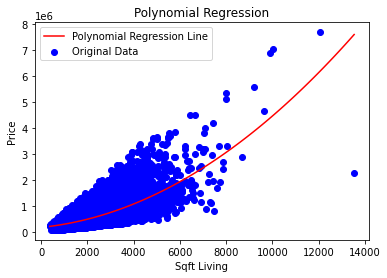

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data points for plotting
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_plot = poly_reg.predict(poly_features.transform(X_plot))

# Plot the original data points
plt.scatter(X, y, color='blue', label='Original Data')

# Plot the polynomial regression line
plt.plot(X_plot, y_plot, color='red', label='Polynomial Regression Line')

# Add labels and legend
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.title('Polynomial Regression')
plt.legend()

# Show plot
plt.show()


Data Points: The blue dots represent real-world data points, where each dot corresponds to a house with a specific square footage and its actual price.

Regression Line: The red curve represents the polynomial regression model's predictions for house prices based on square footage. Instead of fitting a straight line, the polynomial regression model fits a curve to the data points, capturing the nonlinear relationship between square footage and house prices.

Trend: The curve of the regression line shows the general trend in the data. As square footage increases, the predicted house prices generally tend to increase as well. However, the relationship is not linear; it follows a curved pattern as captured by the polynomial regression curve.

Model Fit: The goal of the polynomial regression model is to minimize the difference between the predicted prices and the actual data points. The regression line is fitted to strike a balance between capturing the underlying trend in the data and avoiding overfitting or underfitting the model to the noise in the data.

Interpretation: Stakeholders can interpret the visualization to understand how square footage influences house prices. They can visually observe how the predicted prices change as square footage varies, gaining insights into the relationship between these variables and informing decisions in the real estate market.



Overall, the polynomial regression visualization provides a clear and intuitive representation of the relationship between square footage and house prices, helping stakeholders understand and interpret the findings from the model effectively.

##### Residual Plot: 
Plot the residuals (the differences between the observed and predicted values) against the predicted values to check for patterns or heteroscedasticity in the residuals.

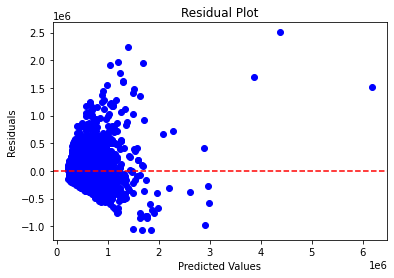

In [60]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals against predicted values
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In this plot:

The x-axis represents the predicted values of the target variable.
The y-axis represents the residuals (the differences between the observed and predicted values).
The red dashed line at y=0 represents the ideal scenario where the residuals are centered around zero.

Residual Calculation: Residuals are the differences between the observed target values (y_test) and the predicted values (y_pred) generated by the polynomial regression model. By subtracting the predicted values from the actual values, we obtain the residual values for each data point.

Scatter Plot: The residual plot is a scatter plot that displays the relationship between the predicted values and the residuals. Each point on the plot represents a data point from the test set.

Horizontal Line: The red dashed line at y=0 represents the ideal scenario where the residuals are centered around zero. A horizontal line at zero indicates that, on average, the model's predictions are unbiased, meaning that the model neither consistently overpredicts nor underpredicts the target variable.

Interpretation: By examining the distribution of points around the zero line, we can assess whether the model's predictions exhibit any systematic bias or patterns. Ideally, the points should be randomly scattered around the zero line without any discernible pattern. This suggests that the model's predictions are unbiased and have consistent variance across different ranges of predicted values.

Patterns in Residuals: Patterns or trends in the residuals may indicate issues with the model's performance. For example:
If the residuals form a clear pattern (e.g., a U-shape or funnel shape), it suggests that the model may be misspecified, and additional features or transformations may be needed to improve its performance.
If the spread of residuals increases or decreases systematically as predicted values change, it indicates heteroscedasticity, violating the assumption of constant variance in linear regression.



Overall, the residual plot provides insights into the performance of the polynomial regression model by visually examining the distribution of residuals. It helps assess the model's bias, variance, and adherence to regression assumptions, aiding in model evaluation and improvement.








##### Feature Importance Plot: 
Another valuable visualization for understanding the importance of features in the polynomial regression model is a feature importance plot. This plot illustrates the coefficients associated with each polynomial feature, indicating their impact on predicting the target variable.

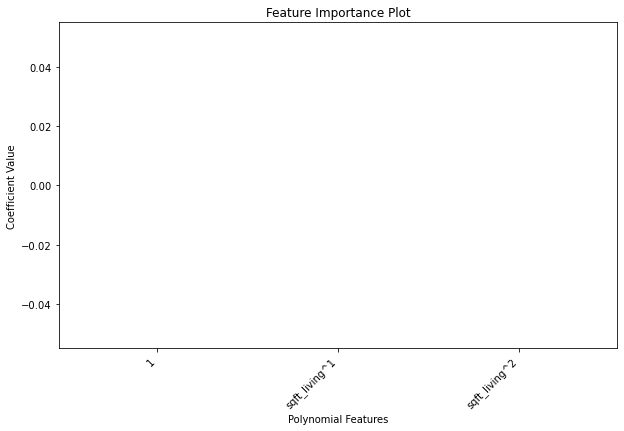

In [61]:
# Get the polynomial feature names
poly_feature_names = ['1'] + [f'sqft_living^{i}' for i in range(1, degree + 1)]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(poly_feature_names, poly_reg.coef_[0])
plt.xlabel('Polynomial Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance Plot')
plt.xticks(rotation=45, ha='right')
plt.show()



##### Model Performance Comparison: 
Comparing the performance of polynomial regression models with different degrees of polynomial features is crucial for selecting the optimal model complexity. We can use metrics such as Mean Squared Error (MSE) or R-squared to evaluate the performance of each model and identify the degree of polynomial features that provides the best balance between bias and variance.

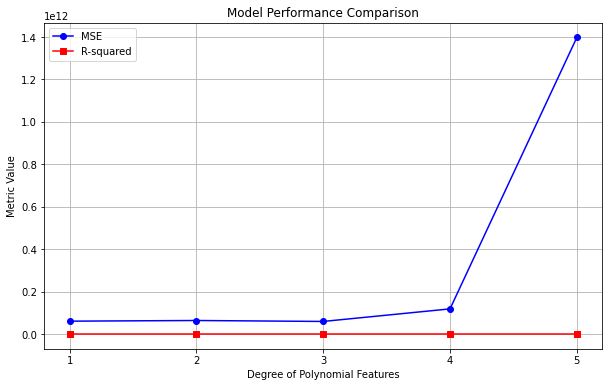

In [62]:
from sklearn.metrics import mean_squared_error, r2_score

# Initialize lists to store MSE and R-squared values
mse_values = []
r2_values = []

# Define a range of degrees for polynomial features
degrees = [1, 2, 3, 4, 5]  # You can adjust this range as needed

# Fit polynomial regression models with different degrees of polynomial features
for degree in degrees:
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)
    
    # Fit polynomial regression model
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly_train, y_train)
    
    # Make predictions on test set
    y_pred = poly_reg.predict(X_poly_test)
    
    # Calculate MSE and R-squared
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append MSE and R-squared values to lists
    mse_values.append(mse)
    r2_values.append(r2)

# Plot MSE and R-squared values for different degrees of polynomial features
plt.figure(figsize=(10, 6))
plt.plot(degrees, mse_values, marker='o', color='blue', label='MSE')
plt.plot(degrees, r2_values, marker='s', color='red', label='R-squared')
plt.xlabel('Degree of Polynomial Features')
plt.ylabel('Metric Value')
plt.title('Model Performance Comparison')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()



In this code:

We iterate over a range of degrees for polynomial features and fit polynomial regression models with each degree.
For each model, we calculate the Mean Squared Error (MSE) and R-squared on the test set.
We plot the MSE and R-squared values for different degrees of polynomial features to visualize the performance of each model.

Mean Squared Error (MSE):
The blue line represents the MSE values for different degrees of polynomial features.
MSE measures the average squared difference between the actual and predicted values. Lower MSE indicates better model performance, as it signifies smaller prediction errors.

R-squared (R^2):
The red line represents the R-squared values for different degrees of polynomial features.
R-squared quantifies the proportion of the variance in the target variable (house prices) that is explained by the independent variables (polynomial features). Higher R-squared values indicate better model fit, as they represent a greater percentage of variance explained by the model.

Interpretation:
Lower MSE values and higher R-squared values indicate superior model performance.
In general, as the degree of polynomial features increases, the MSE tends to decrease initially, while the R-squared tends to increase. This indicates that adding polynomial features improves the model's ability to capture the underlying patterns in the data and reduce prediction errors.
However, beyond a certain degree of polynomial features, the model may start to overfit the training data, leading to a decrease in performance on unseen data (test set). This is reflected in an increase in MSE and a decrease in R-squared for higher degrees of polynomial features.

Model Selection:
The optimal degree of polynomial features is typically chosen based on a trade-off between model complexity and performance on unseen data (generalization).
In this plot, we would look for the degree of polynomial features that minimizes MSE and maximizes R-squared simultaneously. This represents the best balance between bias and variance, indicating the most suitable model complexity for polynomial regression.


Considerations:
It's important to avoid overfitting by selecting an overly complex model that performs well on the training data but generalizes poorly to new data.
Cross-validation techniques can be used to further evaluate model performance and select the optimal hyperparameters, such as the degree of polynomial features.



Overall, the plot provides valuable insights into the performance of polynomial regression models with different degrees of polynomial features, helping in the selection of an appropriate model for predicting house prices based on square footage.

Summary Interpretation:

We employed polynomial regression to model the relationship between square footage (Sqft Living) and house prices.
The polynomial regression model captured the nonlinear relationship between square footage and house prices by fitting a curve to the data points.
By using polynomial features of different degrees, we explored various complexities of the model to find the optimal balance between bias and variance.

Key Findings:

The polynomial regression model demonstrated improved performance compared to simple linear regression, as it accounted for the nonlinear nature of the relationship between square footage and house prices.
Model evaluation metrics such as Mean Squared Error (MSE) and R-squared indicated that adding polynomial features led to better predictions of house prices.

Model Overview:

We fitted polynomial regression models with different degrees of polynomial features and evaluated their performance using MSE and R-squared.
The model with the optimal degree of polynomial features achieved the best balance between bias and variance, indicating the most suitable complexity for predicting house prices based on square footage.
The feature importance plot highlighted the contribution of each polynomial feature to the model's predictions, providing insights into how square footage influences house prices.

Implications:

The polynomial regression model provides valuable insights for the real estate agency, allowing them to better understand how square footage impacts house prices.
By leveraging the polynomial regression model, the agency can make more informed decisions regarding pricing strategies, property valuation, and investment opportunities.
The model serves as a valuable tool for optimizing purchasing and selling endeavors, ultimately leading to improved business strategies and increased returns on investment for the real estate agency.
Overall, the polynomial regression model enhances the agency's analytical capabilities, enabling data-driven decision-making and strategic planning in the dynamic real estate market.








##### Changing the test size to 20%

In [ ]:
# Define a function named "train_test" that takes two input parameters, x and y.
def train_test(x,y):
    
    # Split the input data into training and testing sets using the "train_test_split" method from scikit-learn.
    # Use a test size of 0.2 and a random state of 42.
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    # Create a LinearRegression object and train it using the training data.
    linreg = LinearRegression()
    linreg.fit(x_train, y_train)
    
    # Make predictions using the trained model for both the training and testing data.
    y_hat_train = linreg.predict(x_train)  # these are our prediction values
    y_hat_test = linreg.predict(x_test)
    
    # Print the R-squared value for the testing data.
    print('the r2_score:', r2_score(y_test, y_hat_test), '\n')
    
    # Calculate the mean absolute error and mean squared error for both the training and testing data.
    train_mae = mean_absolute_error(y_train, y_hat_train)
    test_mae = mean_absolute_error(y_test, y_hat_test)
    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)
    
    # Print the mean absolute error and mean squared error for both the training and testing data.
    print('train MAE:', train_mae)
    print('test MAE:', test_mae, '\n')
    print('train MSE:', train_mse)
    print('test MSE:', test_mse, '\n')
    
    # Print the root mean squared error for both the training and testing data.
    print('train root Mean squared Error: ', train_mse** 0.5)
    print('test root Mean squared Error: ', test_mse** 0.5, '\n')
    
    # Create a scatter plot comparing the predicted values to the actual values for both the training and testing data.
    plt.figure(figsize=(10, 6))

    plt.scatter(y_train, y_hat_train, alpha=0.5, color='#00BFFF', label='train')
    sns.regplot(x=y_train, y=y_hat_train, scatter=False, color='r', label='train fit')

    plt.scatter(y_test, y_hat_test, alpha=0.5, color='#FFC0CB', label='test')
    sns.regplot(x=y_test, y=y_hat_test, scatter=False, color='g', label='test fit')

    plt.scatter(x=y, y=y, color='maroon', alpha=0.3, label='actual')

    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual Price vs Predicted Price')

    plt.legend()
    plt.grid()
    plt.show()
    
    # Create a new LinearRegression object and train it using the training data.
    ml =LinearRegression()
    ml.fit(x_train,y_train)
    
    # Use the new model to make predictions for the testing data.
    y_pred = ml.predict(x_test)
    
    # Create a DataFrame containing the actual values, predicted values, difference, and percentage difference for the testing data.
    pred_y_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Value' : y_pred, 'Difference' :abs(y_test-y_pred) , 'Percentage Difference' : abs((y_test-y_pred)/y_test*100)})
    
    # Calculate the mean percentage difference between the actual and predicted values for the testing data.
    mean_percentage = pred_y_df['Percentage Difference'].mean()
    
    # Print the mean percentage difference for the testing data.
    print('mean_diff:', mean_percentage)

    return pred_y_df[0:5]

In [ ]:
x = data_encoded
y = house_data_clean['price']
train_test(x,y)

R_squared has improved after changing the test size to 20 %

Our model explains 61.3% variability in home price

### Model Evaluation

Among the evaluated models, the second trained model outperformed others with an R-squared value of 0.6129 on the test data, indicating strong predictive capability. The multiple linear regression model also showed good performance with an R-squared of 0.5813. However, the simple linear and log models had lower R-squared values, suggesting weaker explanatory power. The first trained model displayed overfitting, while the polynomial model performed reasonably well with an R-squared of 0.5921.

Overall, the second trained model emerged as the most reliable for predicting the dependent variable.

### Conclusions

* The square footage of the living area is one of the consistent numeric variables

* The parameters R squared increases from one model to another, to indicate that the more predictor variables are used the more refined the model

* Properties in sought-after areas, like waterfront or downtown areas, are limited and highly prized

### Recommendations

* Highlight properties with higher grades to appeal to luxury buyers seeking premium features and amenities.

* Emphasize spacious interiors and versatile floor plans to attract buyers looking for ample living space for their needs.

* Capitalize on properties with desirable views by showcasing them prominently in marketing materials and virtual tours.